# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.


In [2]:
from __future__ import print_function
import os
#Data Path to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [4]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join( ['Iris_Data.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [5]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [6]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


Fields are not too badly skewed.

Matplotlib is building the font cache; this may take a moment.


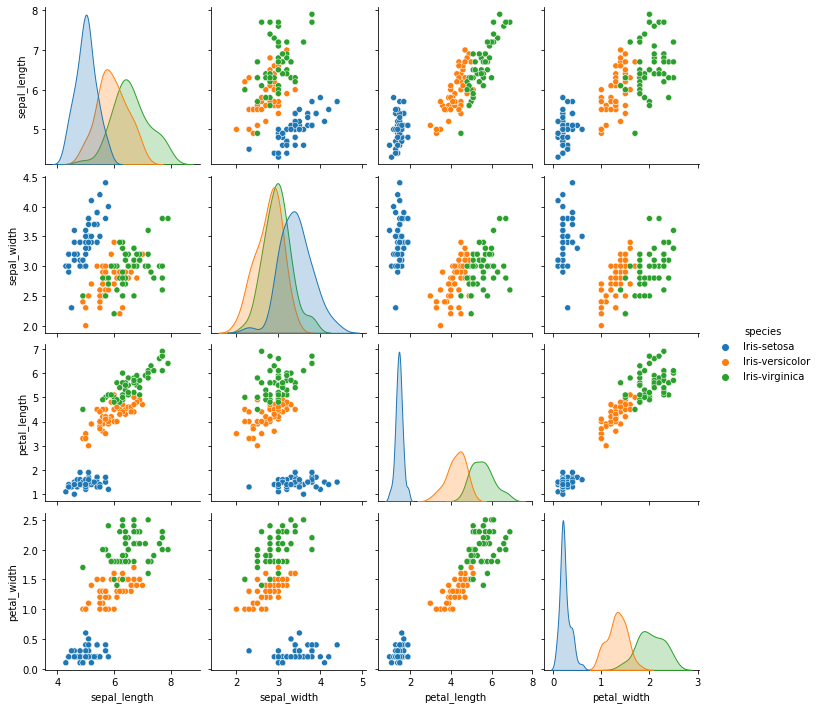

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [10]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.94736842 0.94736842 0.91891892 1.        ]


0.9534139402560455

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
GNB_score = np.mean(scores)

MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
MNB_score = np.mean(scores)

BNB = BernoulliNB()
cv_N = 4
scores = cross_val_score(BNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
BNB_score = np.mean(scores)

print('\n-----------\n')
cross_val_score_dict = {'Gaussian': GNB_score, 'Bernoulli': BNB_score, 'Multinomial': MNB_score}
cross_val_score_dict

[0.94736842 0.94736842 0.91891892 1.        ]
[1.         0.97368421 0.89189189 1.        ]
[0.31578947 0.31578947 0.32432432 0.32432432]

-----------



{'Gaussian': 0.9534139402560455,
 'Bernoulli': 0.3200568990042674,
 'Multinomial': 0.966394025604552}

Resposta esperada: 

{'gaussian': 0.9534139402560455,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.966394025604552}


Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

## $\color{red}{\text{Resposta:}}$


<p>
Os resultados para classificador Naive Bayes utilizando o modelo de Bernoulli é discrepante dos demais devido ao fato de que este modelo é utilizado para variáveis booleanas/binárias e os dados são do tipo float. Por isto, o valor do cross validation foi muito baixo.</p>

<p>
Já o classificador Naive Bayes utilizando o modelo Multinomial, apresentou resultados melhores. Este modelo utiliza a contagem de ocorrências.
</p>

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

X = data[data.columns[0:2]]
print(X.columns)
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
GNB_score = np.mean(scores)

MNB = MultinomialNB()
cv_N = 4
scores = cross_val_score(MNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
MNB_score = np.mean(scores)

BNB = BernoulliNB()
cv_N = 4
scores = cross_val_score(BNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
BNB_score = np.mean(scores)

print('\n-----------\n')
cross_val_score_dict = {'Gaussian': GNB_score, 'Bernoulli': BNB_score, 'Multinomial': MNB_score}
cross_val_score_dict

Index(['sepal_length', 'sepal_width'], dtype='object')
[0.73684211 0.84210526 0.72972973 0.86486486]
[0.65789474 0.65789474 0.64864865 0.62162162]
[0.31578947 0.31578947 0.32432432 0.32432432]

-----------



{'Gaussian': 0.7933854907539118,
 'Bernoulli': 0.3200568990042674,
 'Multinomial': 0.6465149359886202}

Resposta esperada: 

{'gaussian': 0.7933854907539118,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.6465149359886202}



#Come up with your observations after taking away the very predictive features, which model works better

## $\color{red}{\text{Resposta:}}$


<p>
Os resultados para o classificador Naive Bayes utilizando o modelo de Gaussiano foi melhor do que os demais. A diferença de valores com relação ao resultado anterior ocorreu devido à retirada das colunas cuja distribuição das espécies estava em diagonal. A distribuição em diagonal mostra que os dados estão linearmente distribuídos. As features petal_length e petal_width são as mais importantes visto que, visualmente, separam as 3 classes de flores com mais precisão (isto é melhor apresentado nos gráficos que contém as duas features como eixos). Por esse motivo, a retirada dessas features fez com que houvesse uma diminuição no desempenho dos classificadores Naive Bayes. </p>


## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

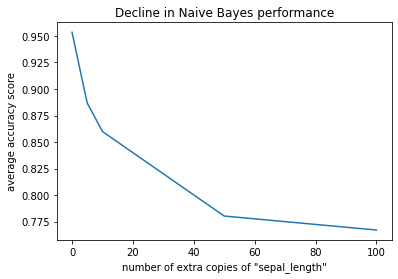

In [21]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


Resposta esperada

![download.png](attachment:.\download.png)